In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-cost/insurance.csv


In [9]:
insurance = pd.read_csv('/kaggle/input/medical-cost/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
insurance.drop_duplicates(inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


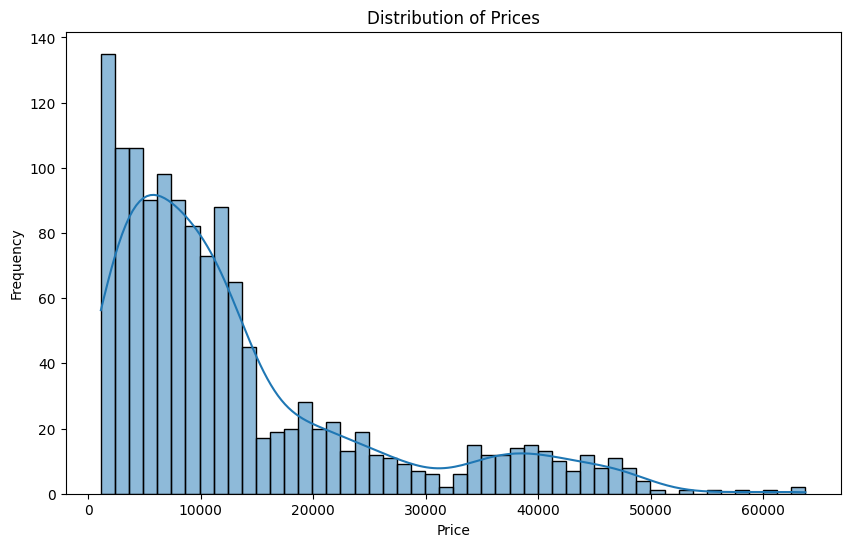

In [18]:
plt.figure(figsize=(10,6))
sns.histplot(insurance['charges'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

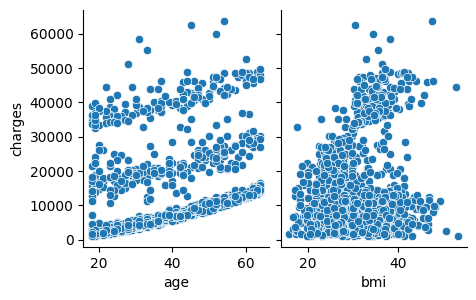

In [24]:
sns.pairplot(insurance, x_vars=['age', 'bmi'], y_vars=['charges'], kind='scatter', height=3, aspect=0.8)
plt.show()

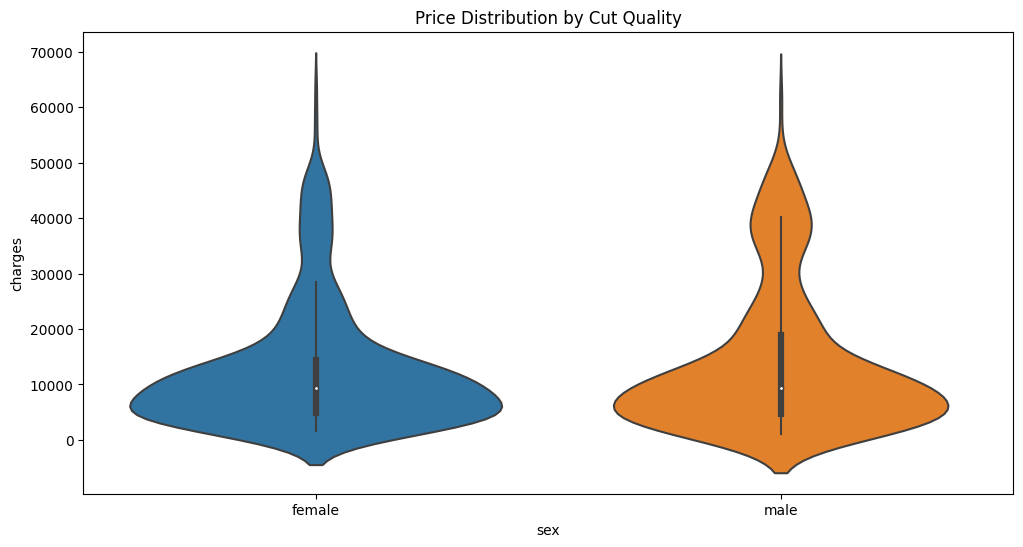

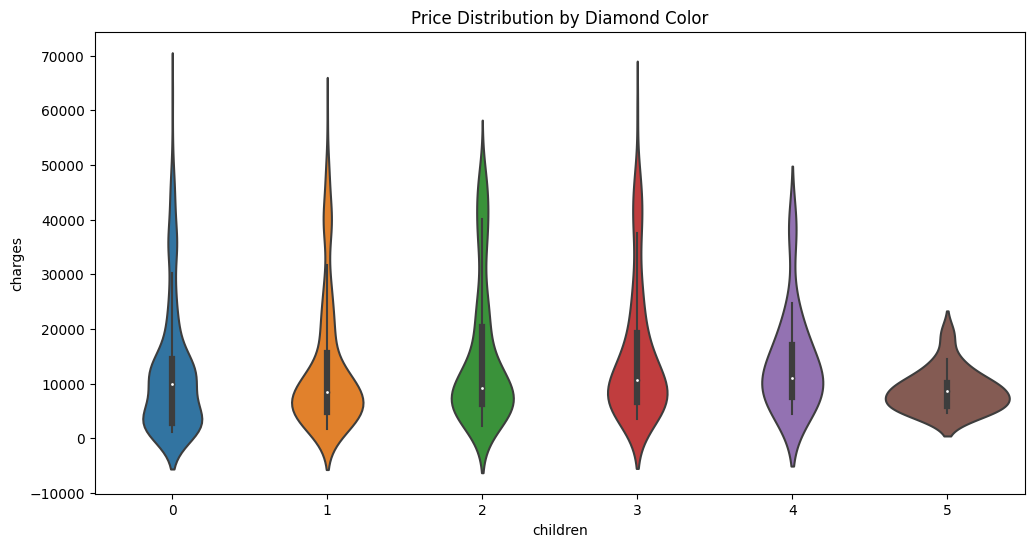

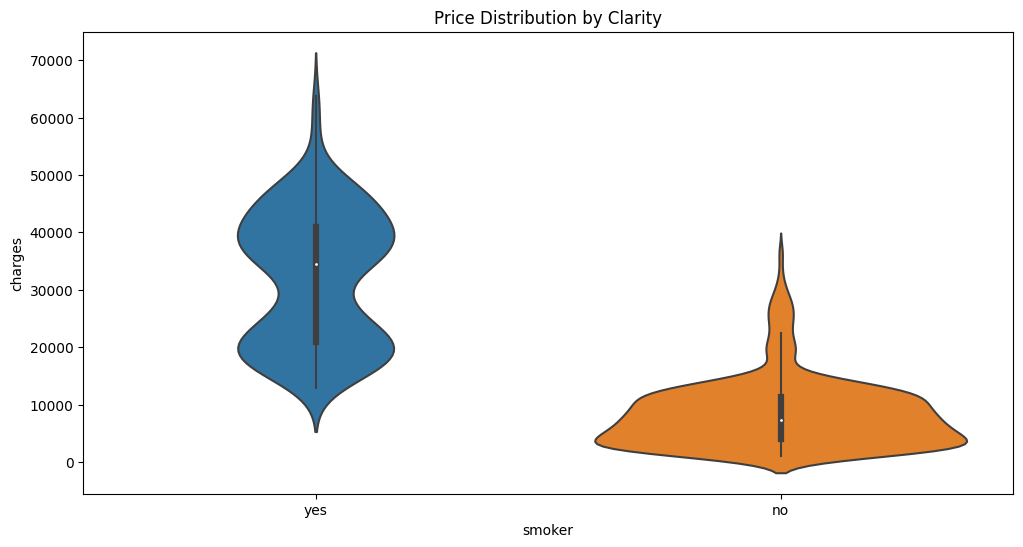

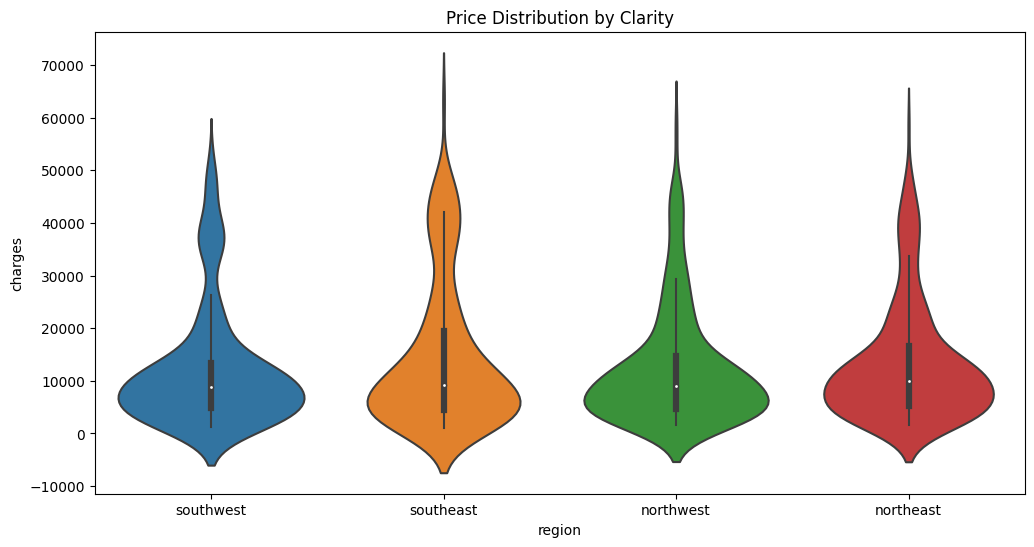

In [25]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=insurance, x='sex', y='charges')
plt.title('Price Distribution by Cut Quality')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=insurance, x='children', y='charges')
plt.title('Price Distribution by Diamond Color')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=insurance, x='smoker', y='charges')
plt.title('Price Distribution by Clarity')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=insurance, x='region', y='charges')
plt.title('Price Distribution by Clarity')
plt.show()

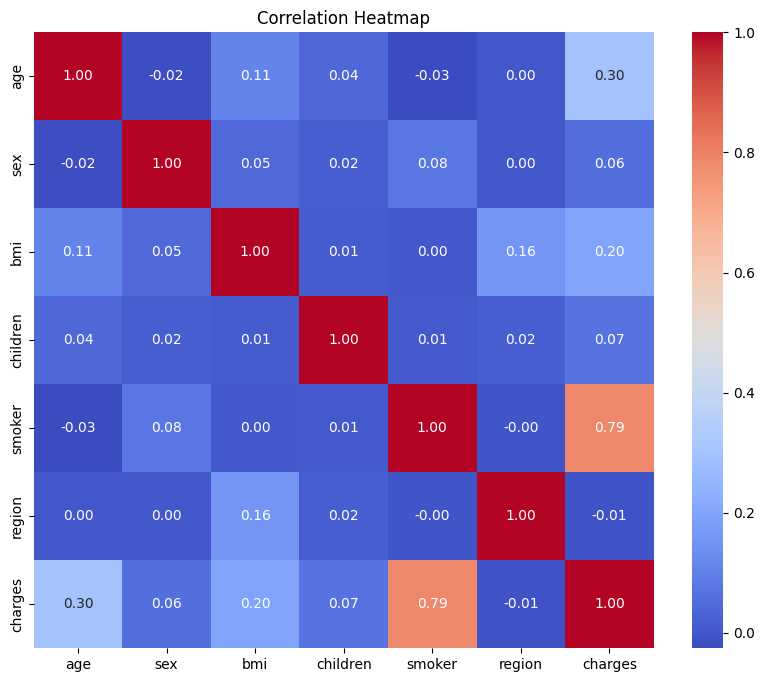

In [28]:
dt = (insurance.dtypes == "object")
object_cols = list(dt[dt].index)

label_data = insurance.copy()
label_encoder = LabelEncoder()

for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
    
correlation_matrix = label_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [31]:
data_encoded = insurance.copy()
label_encoder = LabelEncoder()

for col in object_cols:
    data_encoded[col] = label_encoder.fit_transform(data_encoded[col])

In [32]:
X = data_encoded.drop(columns=['charges'])
y = data_encoded['charges']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=42)

In [40]:
column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)

In [41]:
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

In [44]:
rf_regressor = RandomForestRegressor(n_estimators=100,
                                     random_state=42)
rf_regressor.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [47]:
cv_scores = cross_val_score(rf_regressor, X_train_encoded,
                            y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of Cross-Validation Scores:", cv_scores.std())

Cross-Validation Scores: [0.80862194 0.82953994 0.82575807 0.82686948 0.82069852]
Mean CV Score: 0.8222975896502861
Standard Deviation of Cross-Validation Scores: 0.007414972721345854


In [50]:
y_train_pred = rf_regressor.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)


Training Set Metrics:
Mean Absolute Error: 1038.3740357710012
Mean Squared Error: 3518842.6691920636
R-squared Score: 0.9742990092580271


In [51]:
y_test_pred = rf_regressor.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)


Test Set Metrics:
Mean Absolute Error: 2559.4759595925366
Mean Squared Error: 21637934.07631137
R-squared Score: 0.8822464216937528
